# Planar data classification with one hidden layer

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

# np.random.seed(1) # set a seed so that the results are consistent

## Dataset ##

The following code will load a "flower" 2-class dataset into variables `x` and `y`. Data looks like a "flower" with some red (label y=0) and some blue (y=1) points

In [2]:
x, y = load_planar_dataset()

In [3]:
print(f"Shape of the X: {x.shape}")
print(f"Shape of the Y: {y.shape}")
print(f"No of training examples {x.shape[1]}")

Shape of the X: (2, 400)
Shape of the Y: (1, 400)
No of training examples 400


In [4]:
# Example of the dataset:
print(x[:,0])

[1.20444229 3.57611415]


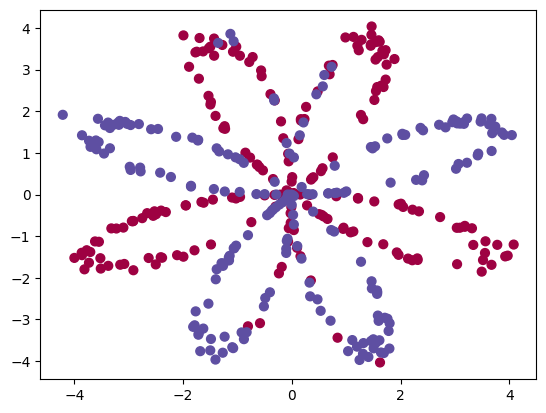

In [5]:
plt.scatter(x[0, :], x[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [6]:
y = np.ravel(y)

### Simple Logistic Regression

Lets first see how logistic regression performs on this problem. Using sklearn's built-in liner regression functions to do that.

In [7]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(x.T, y.T);

In [8]:
x_test = np.c_[np.array([1,2,3]), np.array([4,5,6])]
print(x_test)
print(x_test.shape)

[[1 4]
 [2 5]
 [3 6]]
(3, 2)


In [9]:
y_test = np.c_[np.array([[1,2,3]]), np.array([[4,5,6]])]
print(y_test)
print(y_test.shape)

[[1 2 3 4 5 6]]
(1, 6)


In [10]:
z_test = np.r_[np.array([1,2,3]), np.array([4,5,6])]
print(z_test)

[1 2 3 4 5 6]


In [11]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    
    
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

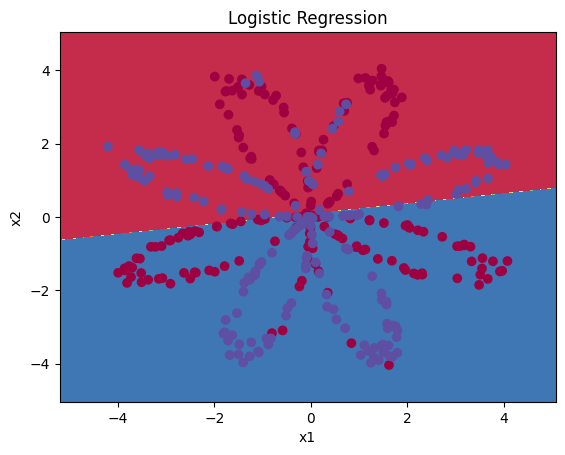

In [12]:
plot_decision_boundary(lambda x_par: clf.predict(x_par), x, y)
plt.title("Logistic Regression")


In [13]:
print(x.T.shape)
print(y.shape)
LR_predictions = clf.predict(x.T) 
print(f"Pred shape: {LR_predictions.shape}")
print(f"Y shape: {y.shape}")
# print(np.dot(y,LR_predictions))
# print(np.dot(1-y,1-LR_predictions))
# print((y.size))
accuracy = (np.dot(y,LR_predictions) + np.dot(1-y,1-LR_predictions))/(y.size)*100
print (f"Accuracy of logistic regression: {accuracy} % (percentage of correctly labelled datapoints)")

(400, 2)
(400,)
Pred shape: (400,)
Y shape: (400,)
Accuracy of logistic regression: 47.0 % (percentage of correctly labelled datapoints)


In [14]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 4], [3, 2]])

dot_product = np.dot(a.T, b)
print(dot_product)

[[14 10]
 [22 16]]


In [15]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

xy = np.dot(x, y)
print(xy)

32


### Neural Network model

Since the logistic regression model didn't perform well on non-linearly separable dataset. We now use the single hidden layer neural network.

**Mathematically**:

For one example  $ x^{(i)} $:

\begin{align}
z^{[1](i)} &= W^{[1]} x^{(i)} + b^{[1]} \tag{1} \\
a^{[1](i)} &= \tanh(z^{[1](i)}) \tag{2} \\
z^{[2](i)} &= W^{[2]} a^{[1](i)} + b^{[2]} \tag{3} \\
\hat{y}^{(i)} = a^{[2](i)} &= \sigma(z^{[2](i)}) \tag{4} \\
y^{(i)}_{\text{prediction}} &= 
\begin{cases} 
1 & \text{if } a^{[2](i)} > 0.5 \\ 
0 & \text{otherwise} 
\end{cases} \tag{5}
\end{align}


Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

The general methodology to build a Neural Network is to:

1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    * Implement forward propagation
    * Compute loss
    * Implement backward propagation to get the gradients
    * Update parameters (gradient descent)

In [16]:
def layer_sizes(x, y):
    x_size = x.shape[0]
    y_size = y.shape[0]
    hidden_size = 3
    
    return (x_size, hidden_size, y_size)

In [17]:
from testCases_v2 import layer_sizes_test_case

X_test, Y_test = layer_sizes_test_case()
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")
(n_x, n_h, n_y) = layer_sizes(X_test, Y_test)

print(f"Input layer size: {n_x}")
print(f"Hidden layer size: {n_h}")
print(f"Output layer size: {n_y}")

X_test shape: (5, 3)
Y_test shape: (2, 3)
Input layer size: 5
Hidden layer size: 3
Output layer size: 2


In [18]:
def init_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1)) * 0.01
    
    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return params

In [19]:
from testCases_v2 import initialize_parameters_test_case

n_x, n_h, n_y = initialize_parameters_test_case()

parameters = init_parameters(n_x, n_h, n_y)
for key, value in parameters.items():
    print(f"{key} shape: {value.shape}")

print(parameters)

W1 shape: (4, 2)
b1 shape: (4, 1)
W2 shape: (1, 4)
b2 shape: (1, 1)
{'W1': array([[-0.00416758, -0.00056267],
       [-0.02136196,  0.01640271],
       [-0.01793436, -0.00841747],
       [ 0.00502881, -0.01245288]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]), 'b2': array([[0.]])}


### Implementing the Forward Propagation

In [20]:
def forward_propagation(X, params):
    
    W1 = params["W1"]
    b1 = params["b1"]
    
    W2 = params["W2"]
    b2 = params["b2"]
    
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    return A2, cache

In [21]:
from testCases_v2 import forward_propagation_test_case


X_assess, params = forward_propagation_test_case()
print(X_assess.shape)
A2, cache = forward_propagation(X_assess, params)

print(f"A2: {A2}")
print(f"Cache: {cache}")

(2, 3)
A2: [[0.21292656 0.21274673 0.21295976]]
Cache: {'Z1': array([[ 1.7386459 ,  1.74687437,  1.74830797],
       [-0.81350569, -0.73394355, -0.78767559],
       [ 0.29893918,  0.32272601,  0.34788465],
       [-0.2278403 , -0.2632236 , -0.22336567]]), 'A1': array([[ 0.9400694 ,  0.94101876,  0.94118266],
       [-0.67151964, -0.62547205, -0.65709025],
       [ 0.29034152,  0.31196971,  0.33449821],
       [-0.22397799, -0.25730819, -0.2197236 ]]), 'Z2': array([[-1.30737426, -1.30844761, -1.30717618]]), 'A2': array([[0.21292656, 0.21274673, 0.21295976]])}


In [22]:
print(np.mean(A2), np.mean(cache["Z2"]), np.mean(cache["A1"]), np.mean(cache["Z1"]))

0.21287768171914198 -1.3076660128732143 0.09199904522700109 0.26281864019752443


Now that we have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, we compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$


In [23]:
def cost_calc(A2, Y):
    
    m = Y.shape[1]
    cross_entropy_loss = np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    
    cost = np.squeeze(-1/m * np.sum(cross_entropy_loss))
    
    return cost

In [24]:
from testCases_v2 import compute_cost_test_case


A2, Y_assess, parameters = compute_cost_test_case()

print(f"cost = {cost_calc(A2, Y_assess)}" )

cost = 0.6930587610394646


Tips:
* $dZ^{[1]} = g^{[1]'}(Z^{[1]})$. \
Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$.
 * So, $dZ^{[1]} = 1-a^2$

In [25]:
def backward_propagation(parameters,cache, X, Y ):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1,keepdims=True)
    
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW2":dW2,
        "db2":db2,
        "dW1":dW1,
        "db1":db1
    }
    
    return grads

In [26]:
from testCases_v2 import backward_propagation_test_case


parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)

print(grads)

{'dW2': array([[ 0.00078841,  0.01765429, -0.00084166, -0.01022527]]), 'db2': array([[-0.16655712]]), 'dW1': array([[ 0.00301023, -0.00747267],
       [ 0.00257968, -0.00641288],
       [-0.00156892,  0.003893  ],
       [-0.00652037,  0.01618243]]), 'db1': array([[ 0.00176201],
       [ 0.00150995],
       [-0.00091736],
       [-0.00381422]])}


In [27]:
def optimization(grads, parameters, learning_rate):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dw1 = grads["dW1"]
    db1 = grads["db1"]
    
    dw2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    
    W2 = W2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        "W1":W1, 
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return parameters

In [28]:
from testCases_v2 import update_parameters_test_case


parameters, grads = update_parameters_test_case()
parameters = optimization(grads, parameters, 1.2)

print(parameters)

{'W1': array([[-0.00643025,  0.01936718],
       [-0.02410458,  0.03978052],
       [-0.01653973, -0.02096177],
       [ 0.01046864, -0.05990141]]), 'b1': array([[-1.02420756e-06],
       [ 1.27373948e-05],
       [ 8.32996807e-07],
       [-3.20136836e-06]]), 'W2': array([[-0.01041081, -0.04463285,  0.01758031,  0.04747113]]), 'b2': array([[0.00010457]])}


In [29]:
def nn_model(X, Y, n_h, learning_rate, num_itr=10000):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    params = init_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_itr):
        
        A2, cache = forward_propagation(X, params)
        
        cost = cost_calc(A2, Y)
        
        grads = backward_propagation(params, cache, X, Y)
        
        params = optimization(grads, params, learning_rate)
        
        # if i % 100 == 0:
        #     print(f"Cost after {i}th iteration is: {cost}")
            
    return params

In [30]:
from testCases_v2 import nn_model_test_case


X_assess, Y_assess = nn_model_test_case()
print(X_assess.shape)
print(Y_assess.shape)
parameters = nn_model(X_assess, Y_assess, 4, 1.02, num_itr=10000)

(2, 3)
(1, 3)


In [31]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)

    return predictions

In [32]:
from testCases_v2 import predict_test_case


parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print(f"predictions mean: {np.mean(predictions)}")

predictions mean: 0.6666666666666666


Text(0.5, 1.0, 'Decision Boundary for hidden layer size: 4')

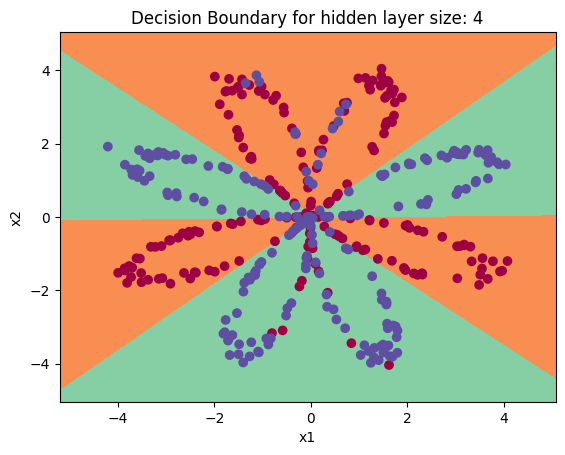

In [33]:
x, y = load_planar_dataset()
parameters = nn_model(x, y, 4, 1.2 , num_itr = 10000)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), x, y)
plt.title(f"Decision Boundary for hidden layer size: {4}" )

In [34]:
predictions = predict(parameters, x)
print(f'Accuracy: {float((np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / y.size * 100):.2f}%')

Accuracy: 90.50%


/tmp/ipykernel_3862/2806239433.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Accuracy: {float((np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / y.size * 100):.2f}%')


/tmp/ipykernel_3862/1096822576.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / y.size * 100)


Accuracy for 1 hidden units: 67.50 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.75 %
Accuracy for 5 hidden units: 91.75 %
Accuracy for 20 hidden units: 92.50 %
Accuracy for 22 hidden units: 91.75 %
Accuracy for 24 hidden units: 92.75 %
Accuracy for 26 hidden units: 91.00 %


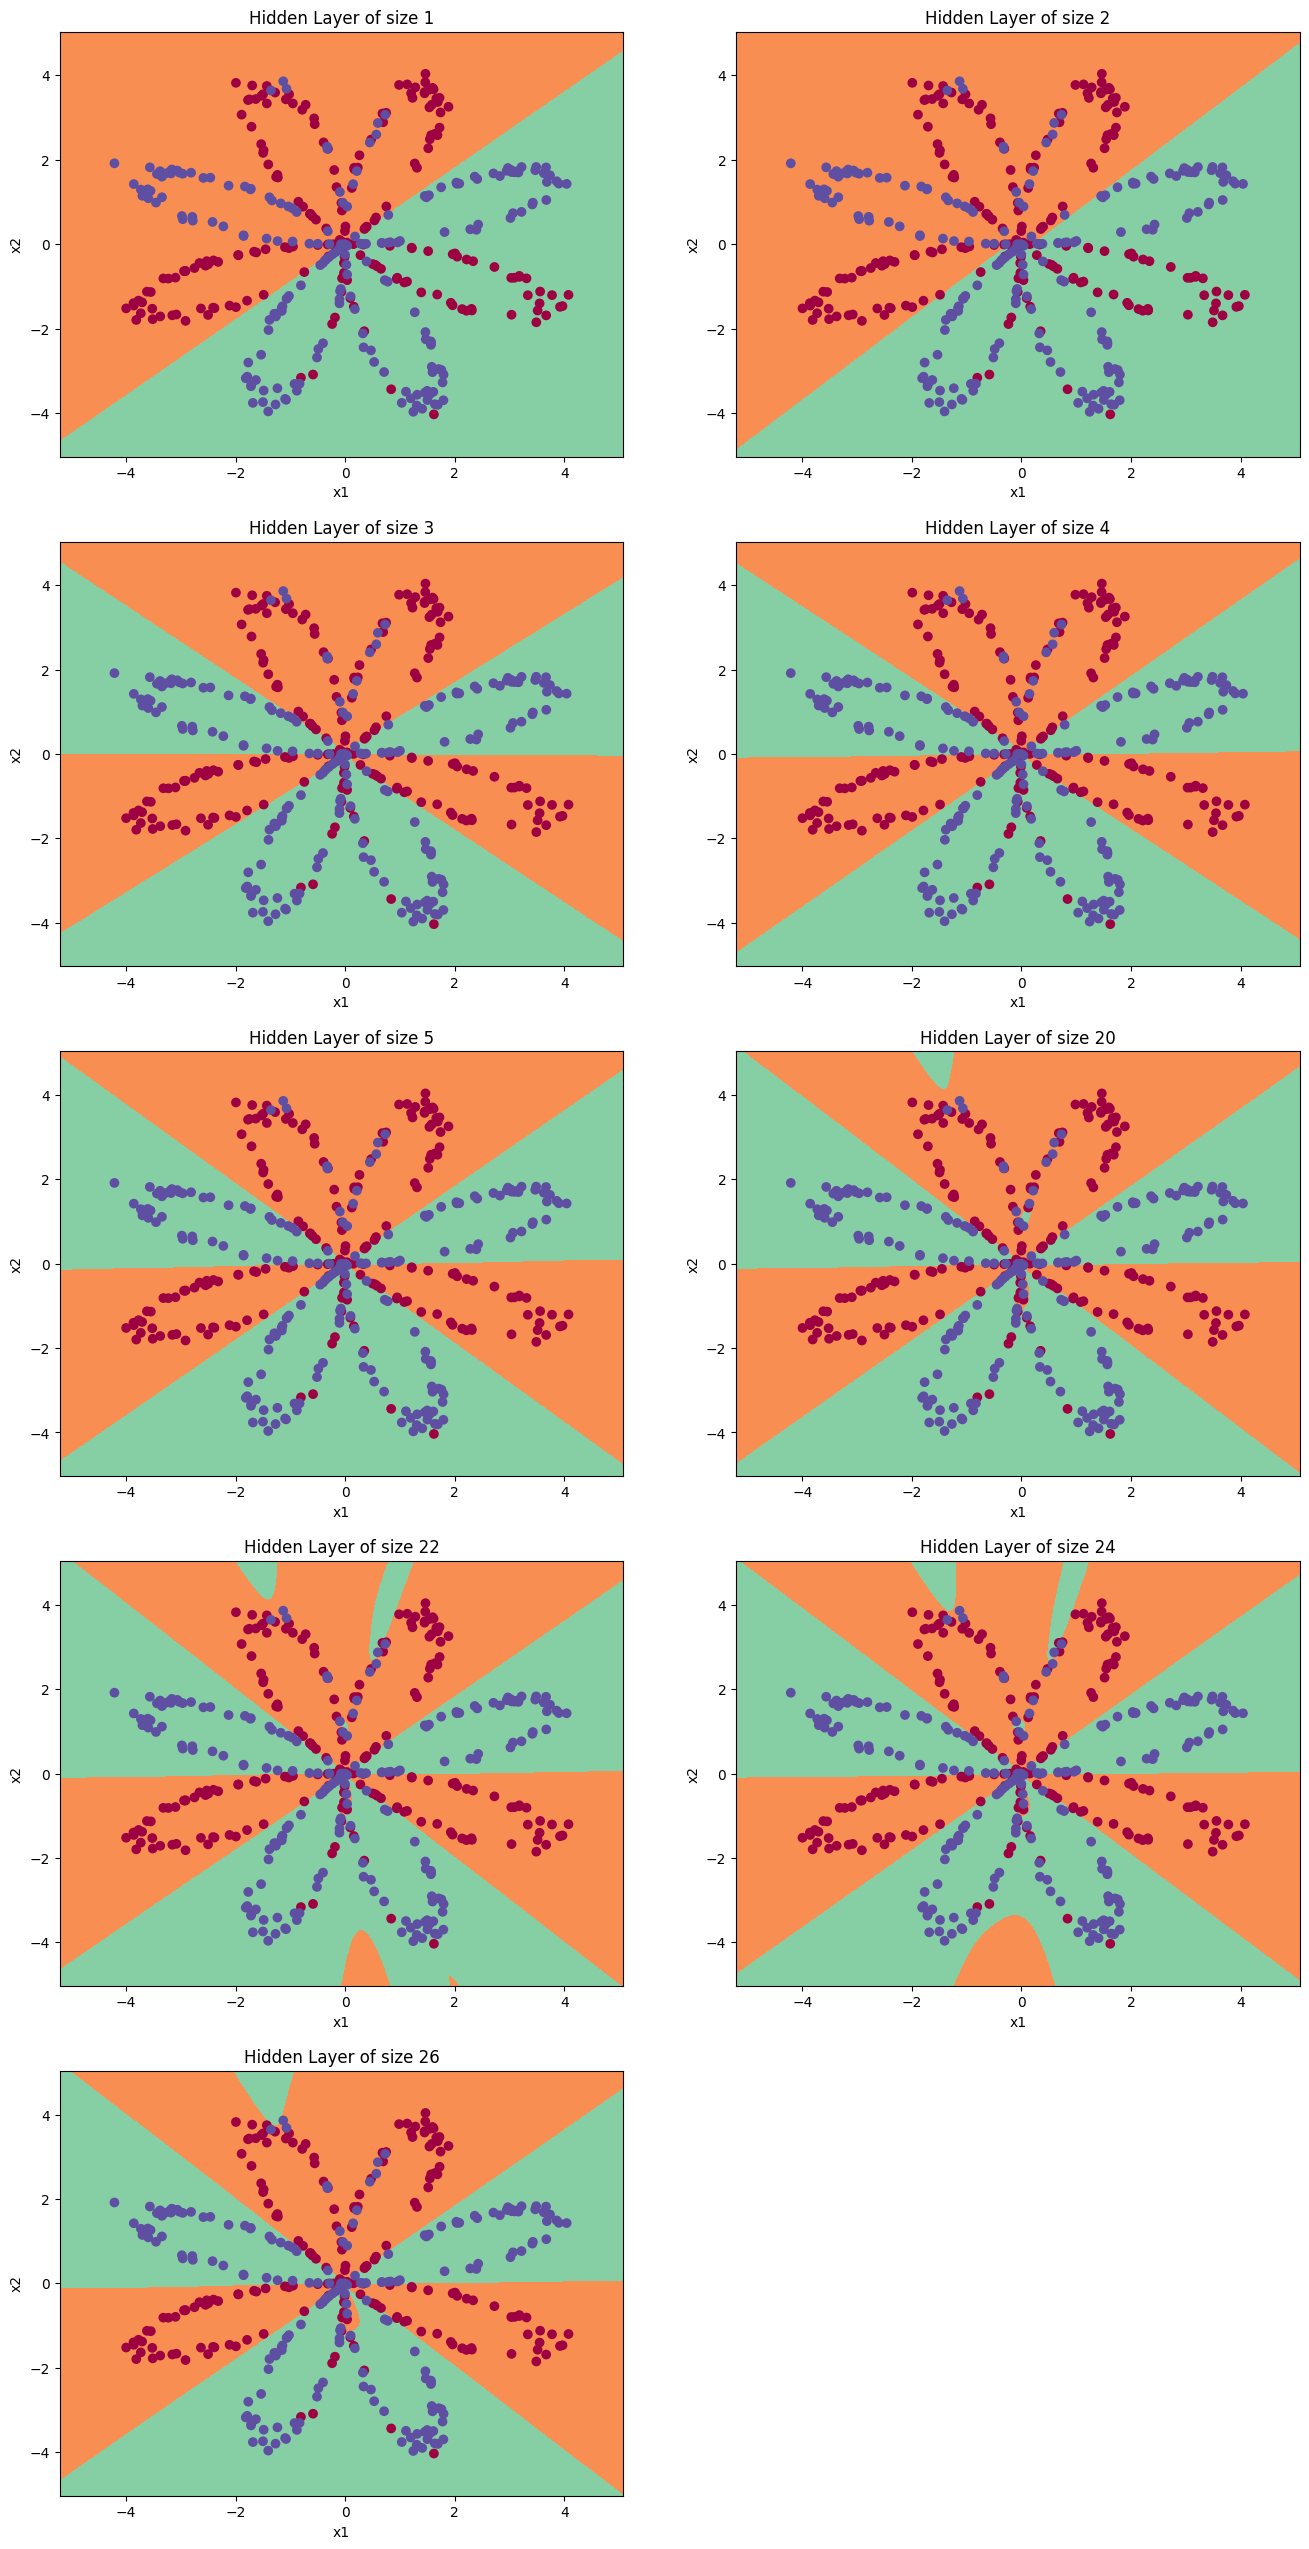

In [35]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 22, 24, 26]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title(f'Hidden Layer of size {n_h}')
    parameters = nn_model(x, y, n_h, 1, num_itr=10000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), x, y)
    predictions = predict(parameters, x)
    accuracy = float((np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / y.size * 100)
    print(f'Accuracy for {n_h} hidden units: {accuracy:.2f} %')


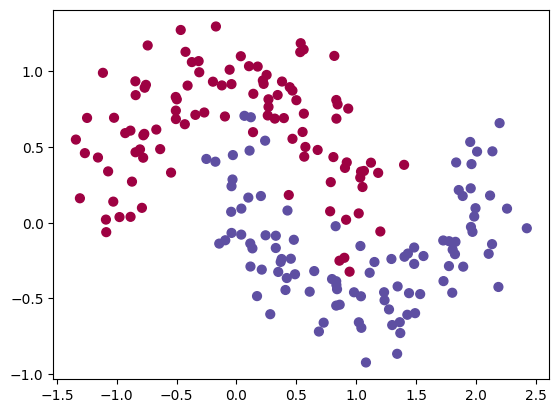

In [36]:
from planar_utils import load_extra_datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

if dataset == "blobs":
    Y = Y%2

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

/tmp/ipykernel_3862/2860676020.py:4: RuntimeWarning: divide by zero encountered in log
  cross_entropy_loss = np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
/tmp/ipykernel_3862/2860676020.py:4: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_loss = np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2))


Text(0.5, 1.0, 'Decision Boundary for hidden layer size: 10')

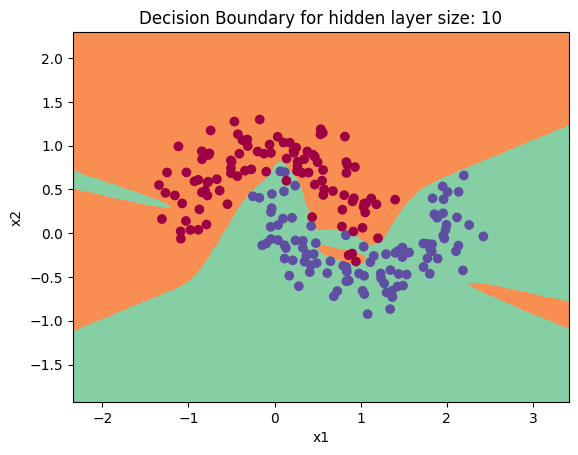

In [59]:
hidden_layers = 10

parameters = nn_model(X, Y, hidden_layers, 1.2 , num_itr = 100000)

# Plot the decision boundary
plot_decision_boundary(lambda X: predict(parameters, X.T), X, Y)
plt.title(f"Decision Boundary for hidden layer size: {hidden_layers}" )

In [61]:
predictions = predict(parameters, X)
print(f'Accuracy: {np.squeeze((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / Y.size * 100):.2f}%')

Accuracy: 99.50%
